# AIRBNB DATASET

### "Using the New York City Airbnb dataset, 
### can you develop a model that classifies Airbnb listings into different room types (e.g., private room, entire home, shared room) based on features such as location, price, and host characteristics? 

### Additionally, how well does the model perform in accurately categorizing room types, and which features are most indicative of the room type? 

### Lastly, can you uncover any spatial patterns or neighborhood-specific trends in room type preferences?"

In [1]:
#importing libraries:

# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   +

In [2]:
df = pd.read_csv("D://DATA//Atees global Thrissur//ML//Airbnb//AB_NYC_2019.csv")
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Finding the count of null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [74]:
#df_new = df.drop(['name','host_name', 'neighbourhood_group', 'neighbourhood', ], axis=1)
# df_new.head()

In [6]:
df['name'].fillna("Unknown",inplace=True)
df['host_name'].fillna("Unknown",inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace = True)

In [7]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

In [9]:
df['last_review'].max()

Timestamp('2019-07-08 00:00:00')

In [10]:
df['last_review'].fillna('2019-07-08 ',inplace = True)
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0  2019-07-08   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

# DATA VISUALIZATION

In [12]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

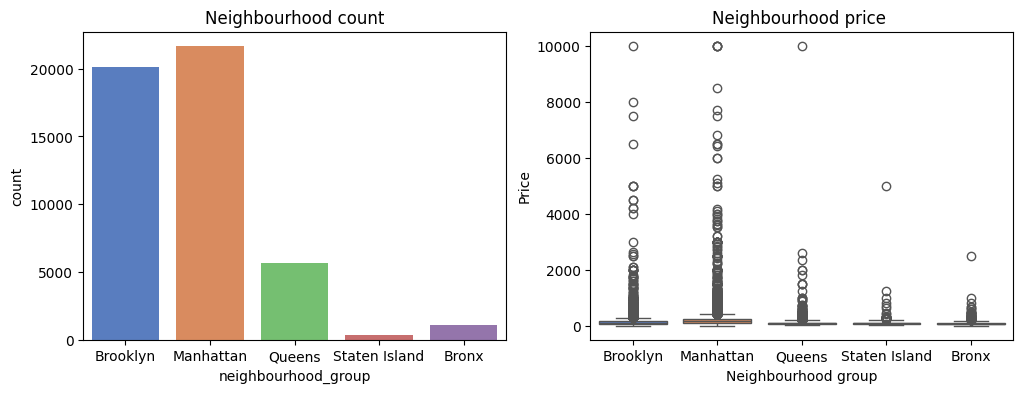

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data=df, x='neighbourhood_group', palette='muted')
plt.title("Neighbourhood count", fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='muted')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")
plt.title("Neighbourhood price ", fontsize=12)

plt.show()

In [14]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

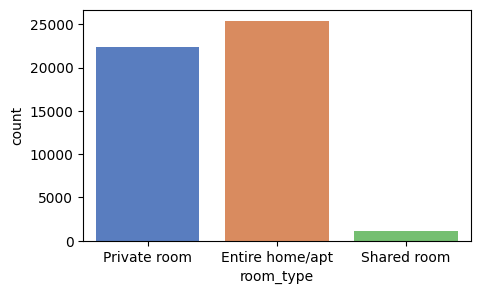

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='room_type', palette='muted')
plt.show()

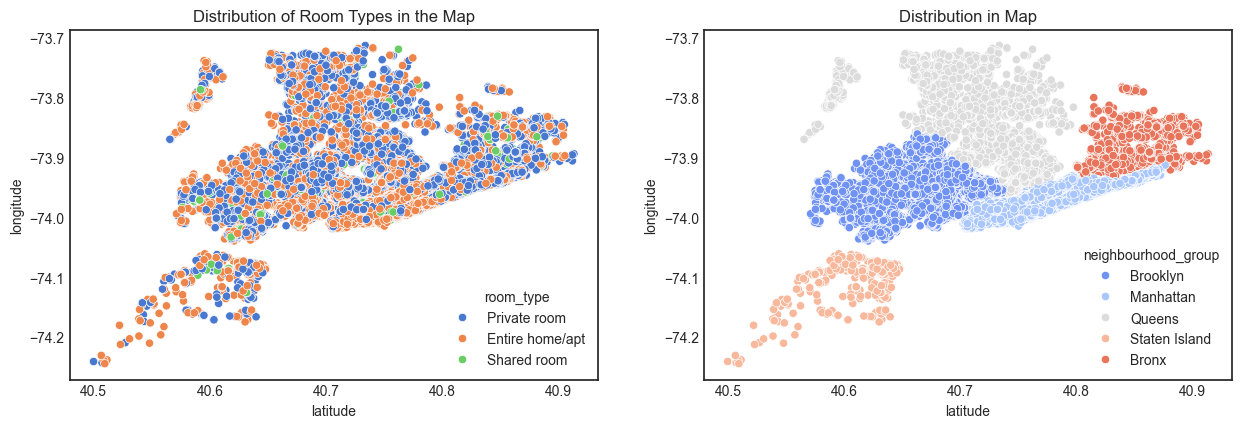

In [25]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="room_type" , palette="muted", data = df)
plt.title('Distribution of Room Types in the Map')

plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group",palette="coolwarm", data=df)
plt.title('Distribution in Map')

plt.show()

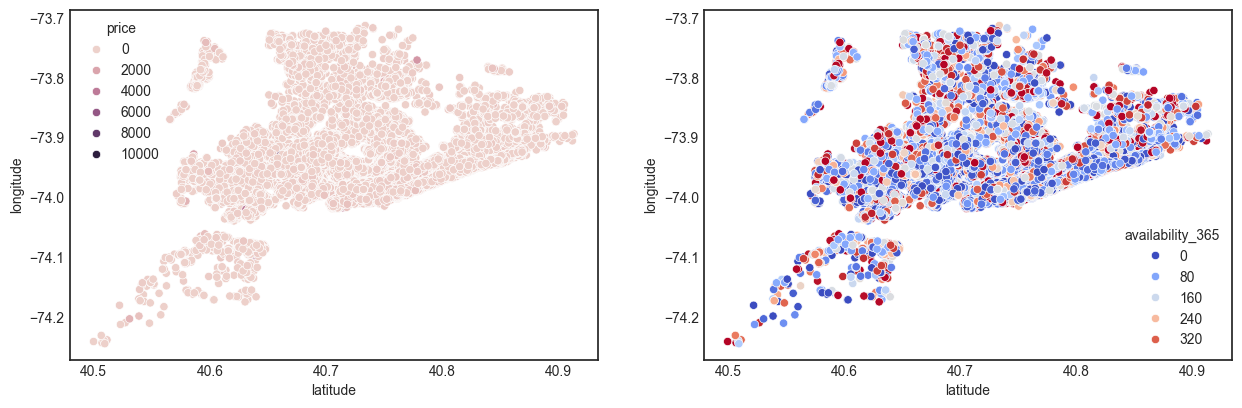

In [17]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=df)

plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365",palette="coolwarm", data=df)
plt.show()

In [18]:
df_new = df.copy()
df_new.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0  2019-07-08   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0           0.210000                               6               365  
1           0.380000                               2               355  
2           1.373221                               1               365  
3           4.640000                               1               194  
4           0.100000                               1                 0

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_new['name'] = le.fit_transform (df_new['name'])
df_new['host_name'] = le.fit_transform (df_new['host_name'])
df_new['neighbourhood_group'] = le.fit_transform (df_new['neighbourhood_group'])
df_new['neighbourhood'] = le.fit_transform (df_new['neighbourhood'])
df_new['room_type'] = le.fit_transform (df_new['room_type'])

df_new .head()

id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0  2539  12328     2787       4989                    1            108   
1  2595  37455     2845       4785                    2            127   
2  3647  43543     4632       2909                    2             94   
3  3831  14783     4869       6203                    1             41   
4  5022  18693     7192       5923                    2             61   

   latitude  longitude  room_type  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237          1    149               1                  9   
1  40.75362  -73.98377          0    225               1                 45   
2  40.80902  -73.94190          1    150               3                  0   
3  40.68514  -73.95976          0     89               1                270   
4  40.79851  -73.94399          0     80              10                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2018-10-19           0.210000                               6   
1  2019-05-21           0.380000                               2   
2  2019-07-08           1.373221                               1   
3  2019-07-05           4.640000                               1   
4  2018-11-19           0.100000                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

##**Univariate Analysis**

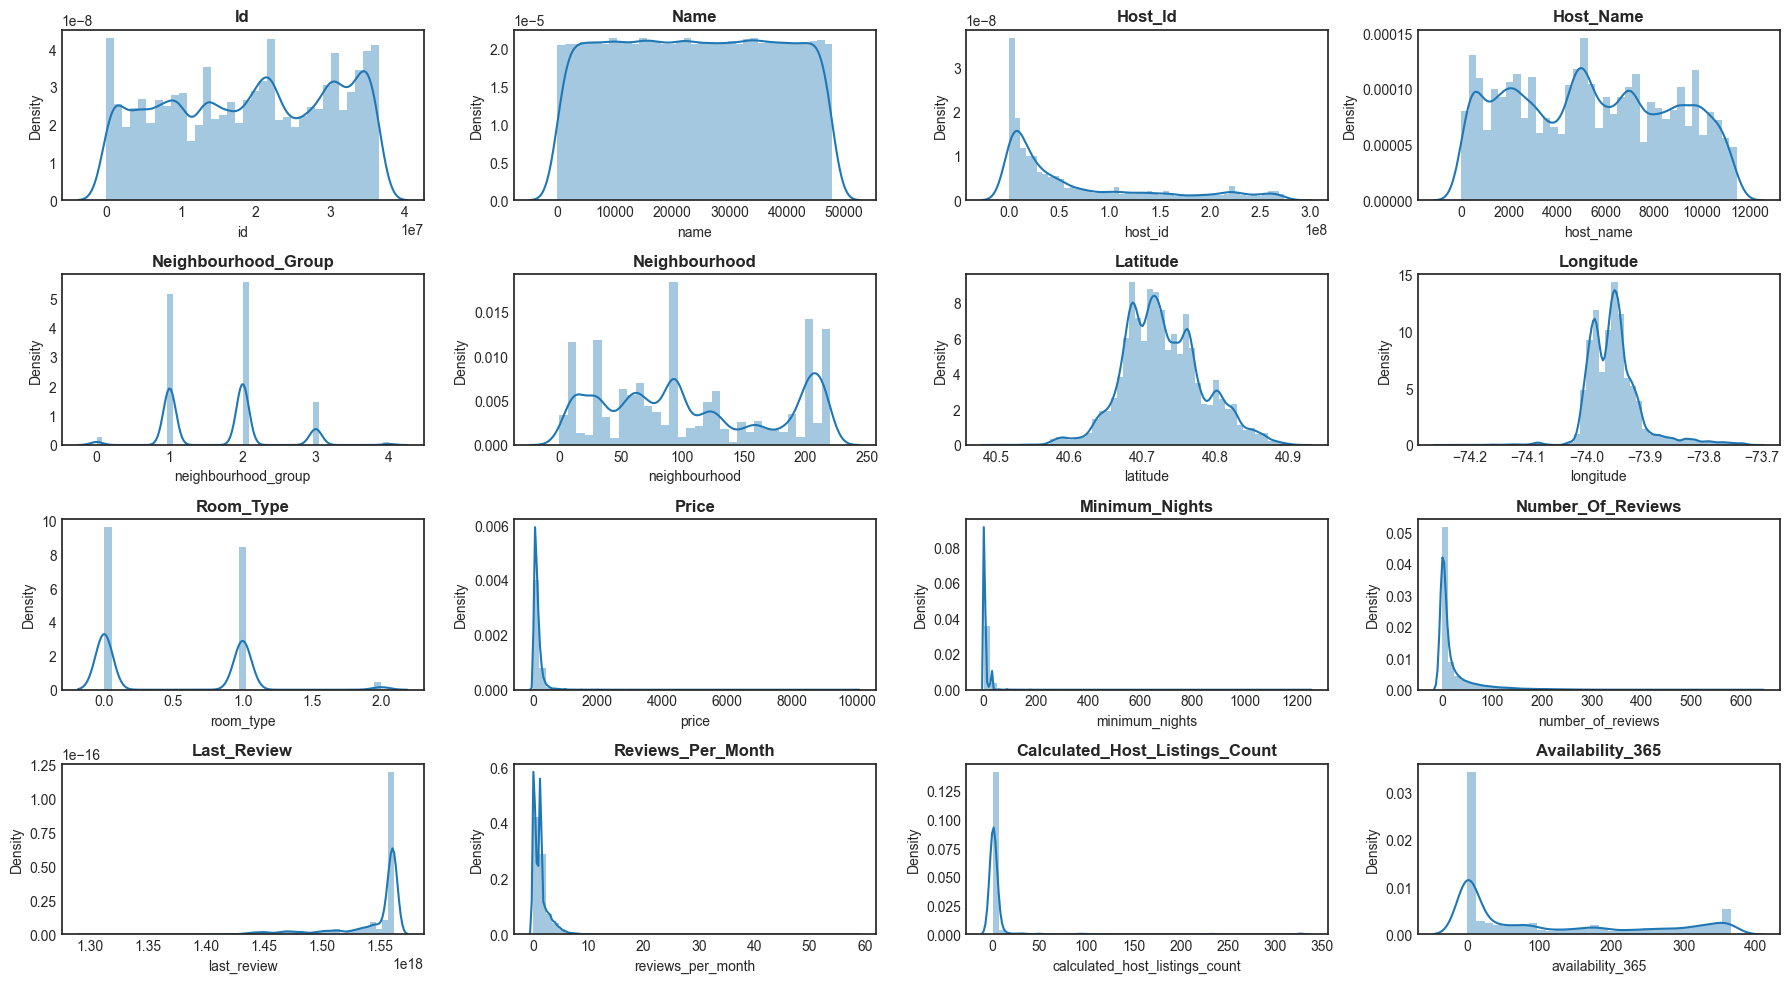

In [41]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(df_new):
  plt.subplot(5, 4, n+1)
  sns.distplot(df_new[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

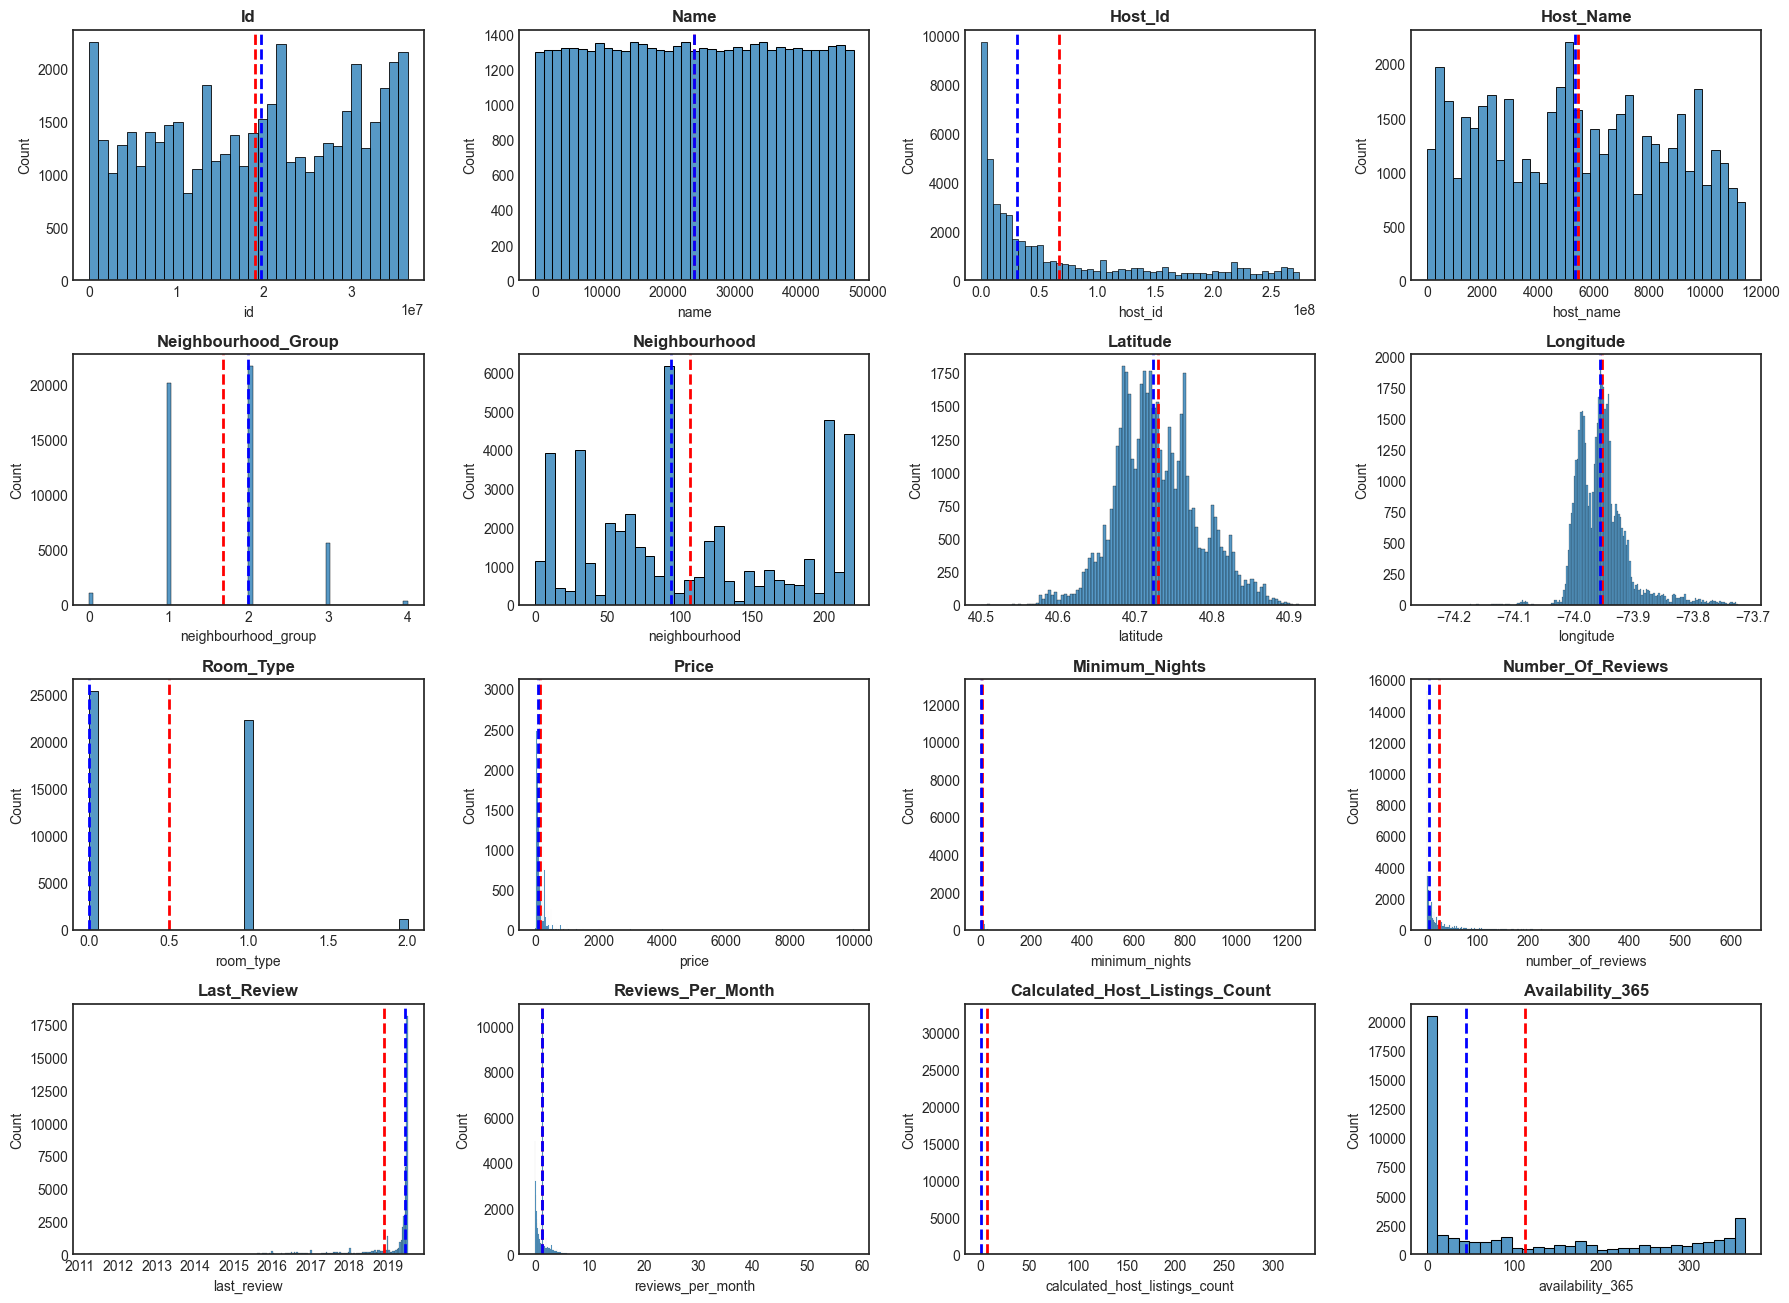

In [26]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df_new.columns):
  feature = df_new[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##**Bivariate Analysis**

TypeError: unsupported operand type(s) for *: 'float' and 'Timestamp'

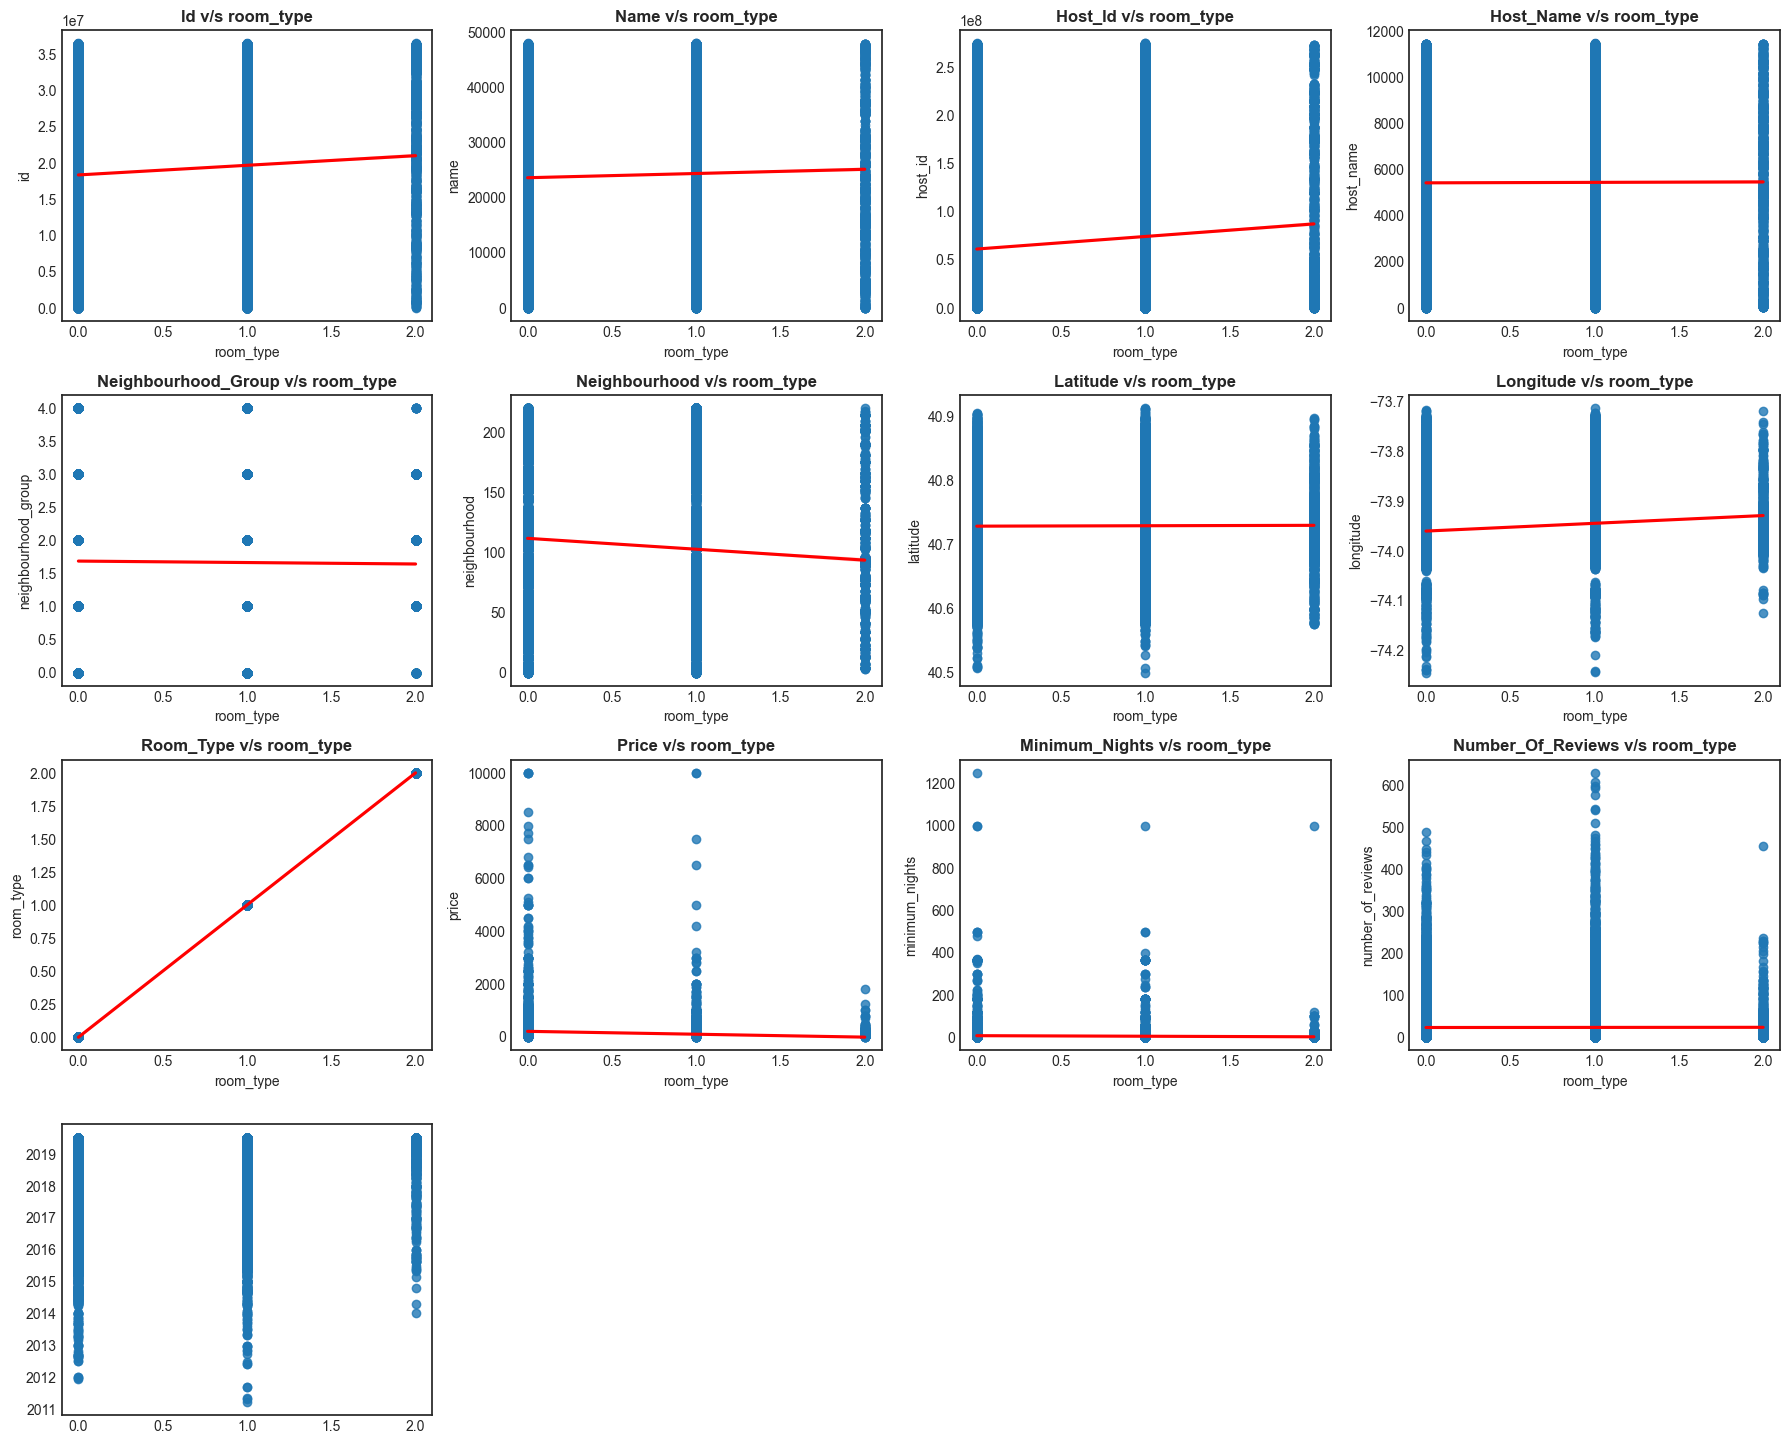

In [28]:
# Checking Linearity
independent_variables = [i for i in df_new.columns if i not in ['room_type']]

plt.figure(figsize=(18,18))
for n,column in enumerate(df_new.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df_new['room_type'], y =df_new[column],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s room_type',weight='bold')
  plt.tight_layout()

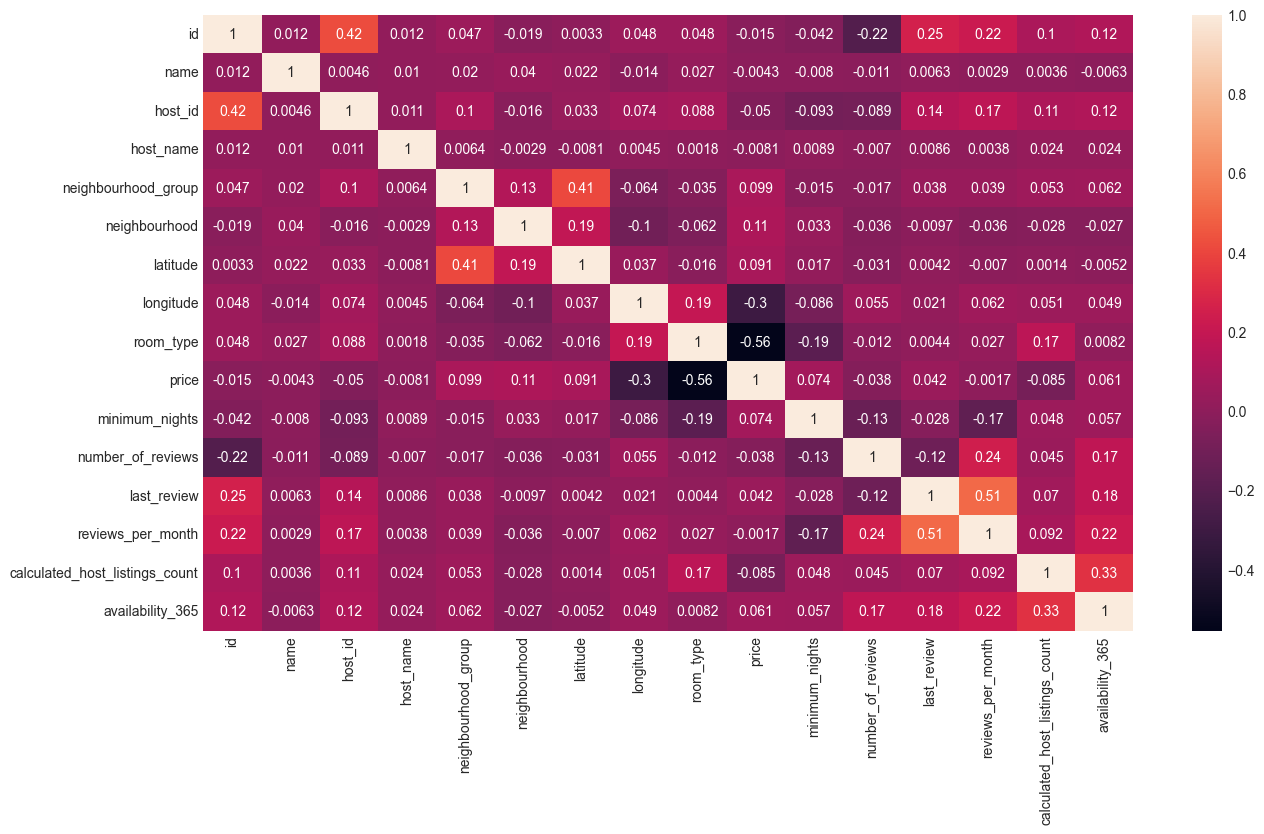

In [20]:
corr = df_new.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_new.columns
plt.show()

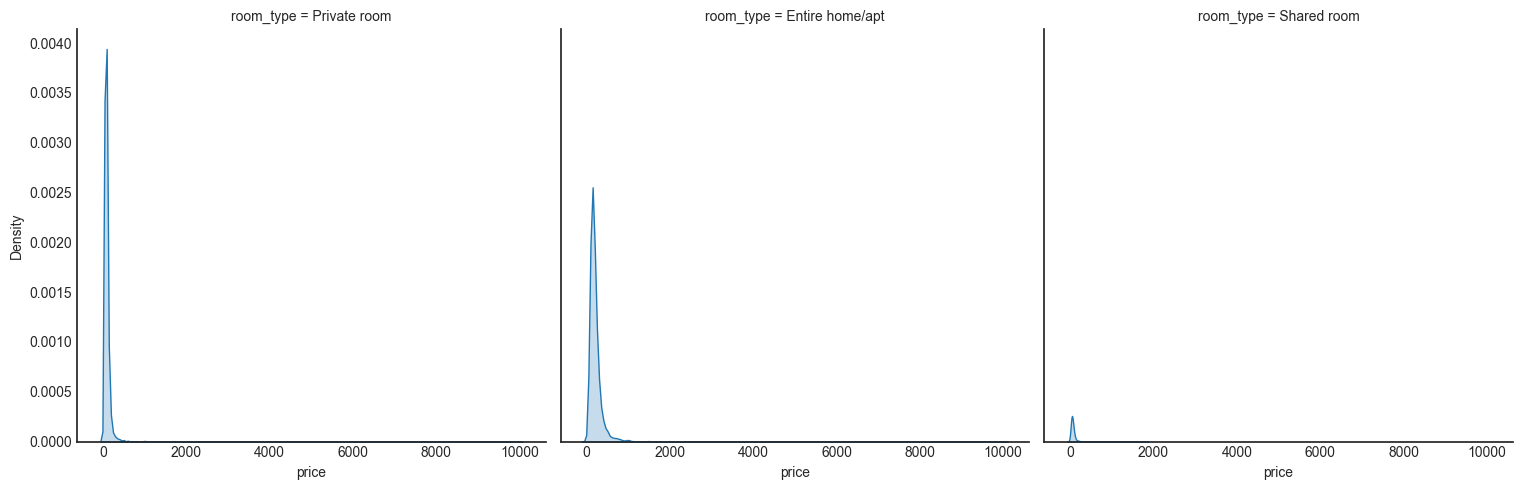

In [36]:
sns.displot(data=df, x='price', kind='kde', fill=True, col='room_type', col_wrap=5, palette='muted')
plt.show()

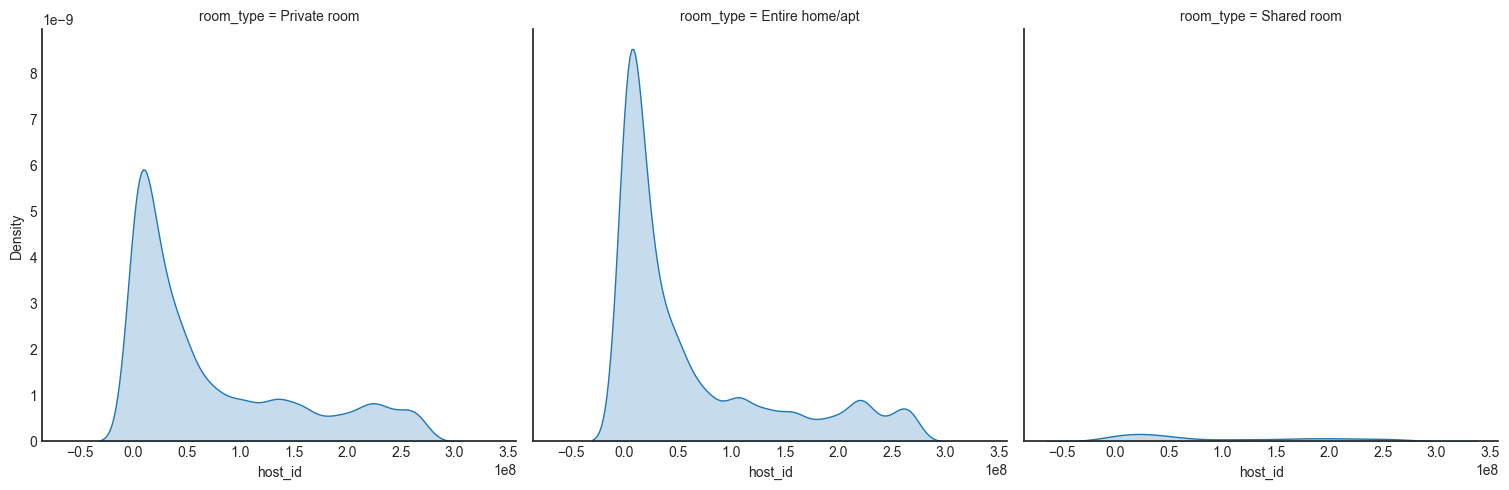

In [30]:
sns.displot(data=df, x='host_id', kind='kde', fill=True, col='room_type', col_wrap=5, palette='muted')
plt.show()

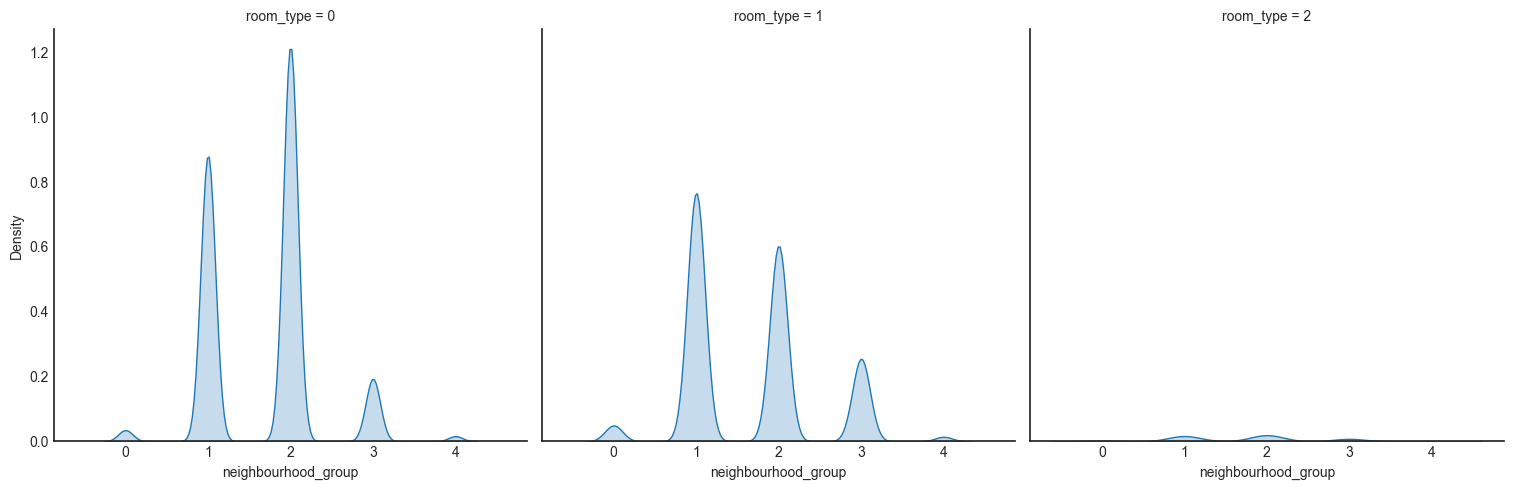

In [32]:
sns.displot(data=df_new, x='neighbourhood_group', kind='kde', fill=True, col='room_type', col_wrap=5, palette='muted')
plt.show()

In [22]:
df_new1  = df_new. drop(['name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1)
df_new1.head()

id  neighbourhood_group  neighbourhood  room_type  price  minimum_nights  \
0  2539                    1            108          1    149               1   
1  2595                    2            127          0    225               1   
2  3647                    2             94          1    150               3   
3  3831                    1             41          0     89               1   
4  5022                    2             61          0     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9           0.210000                               6   
1                 45           0.380000                               2   
2                  0           1.373221                               1   
3                270           4.640000                               1   
4                  9           0.100000                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

<Figure size 1000x1200 with 0 Axes>

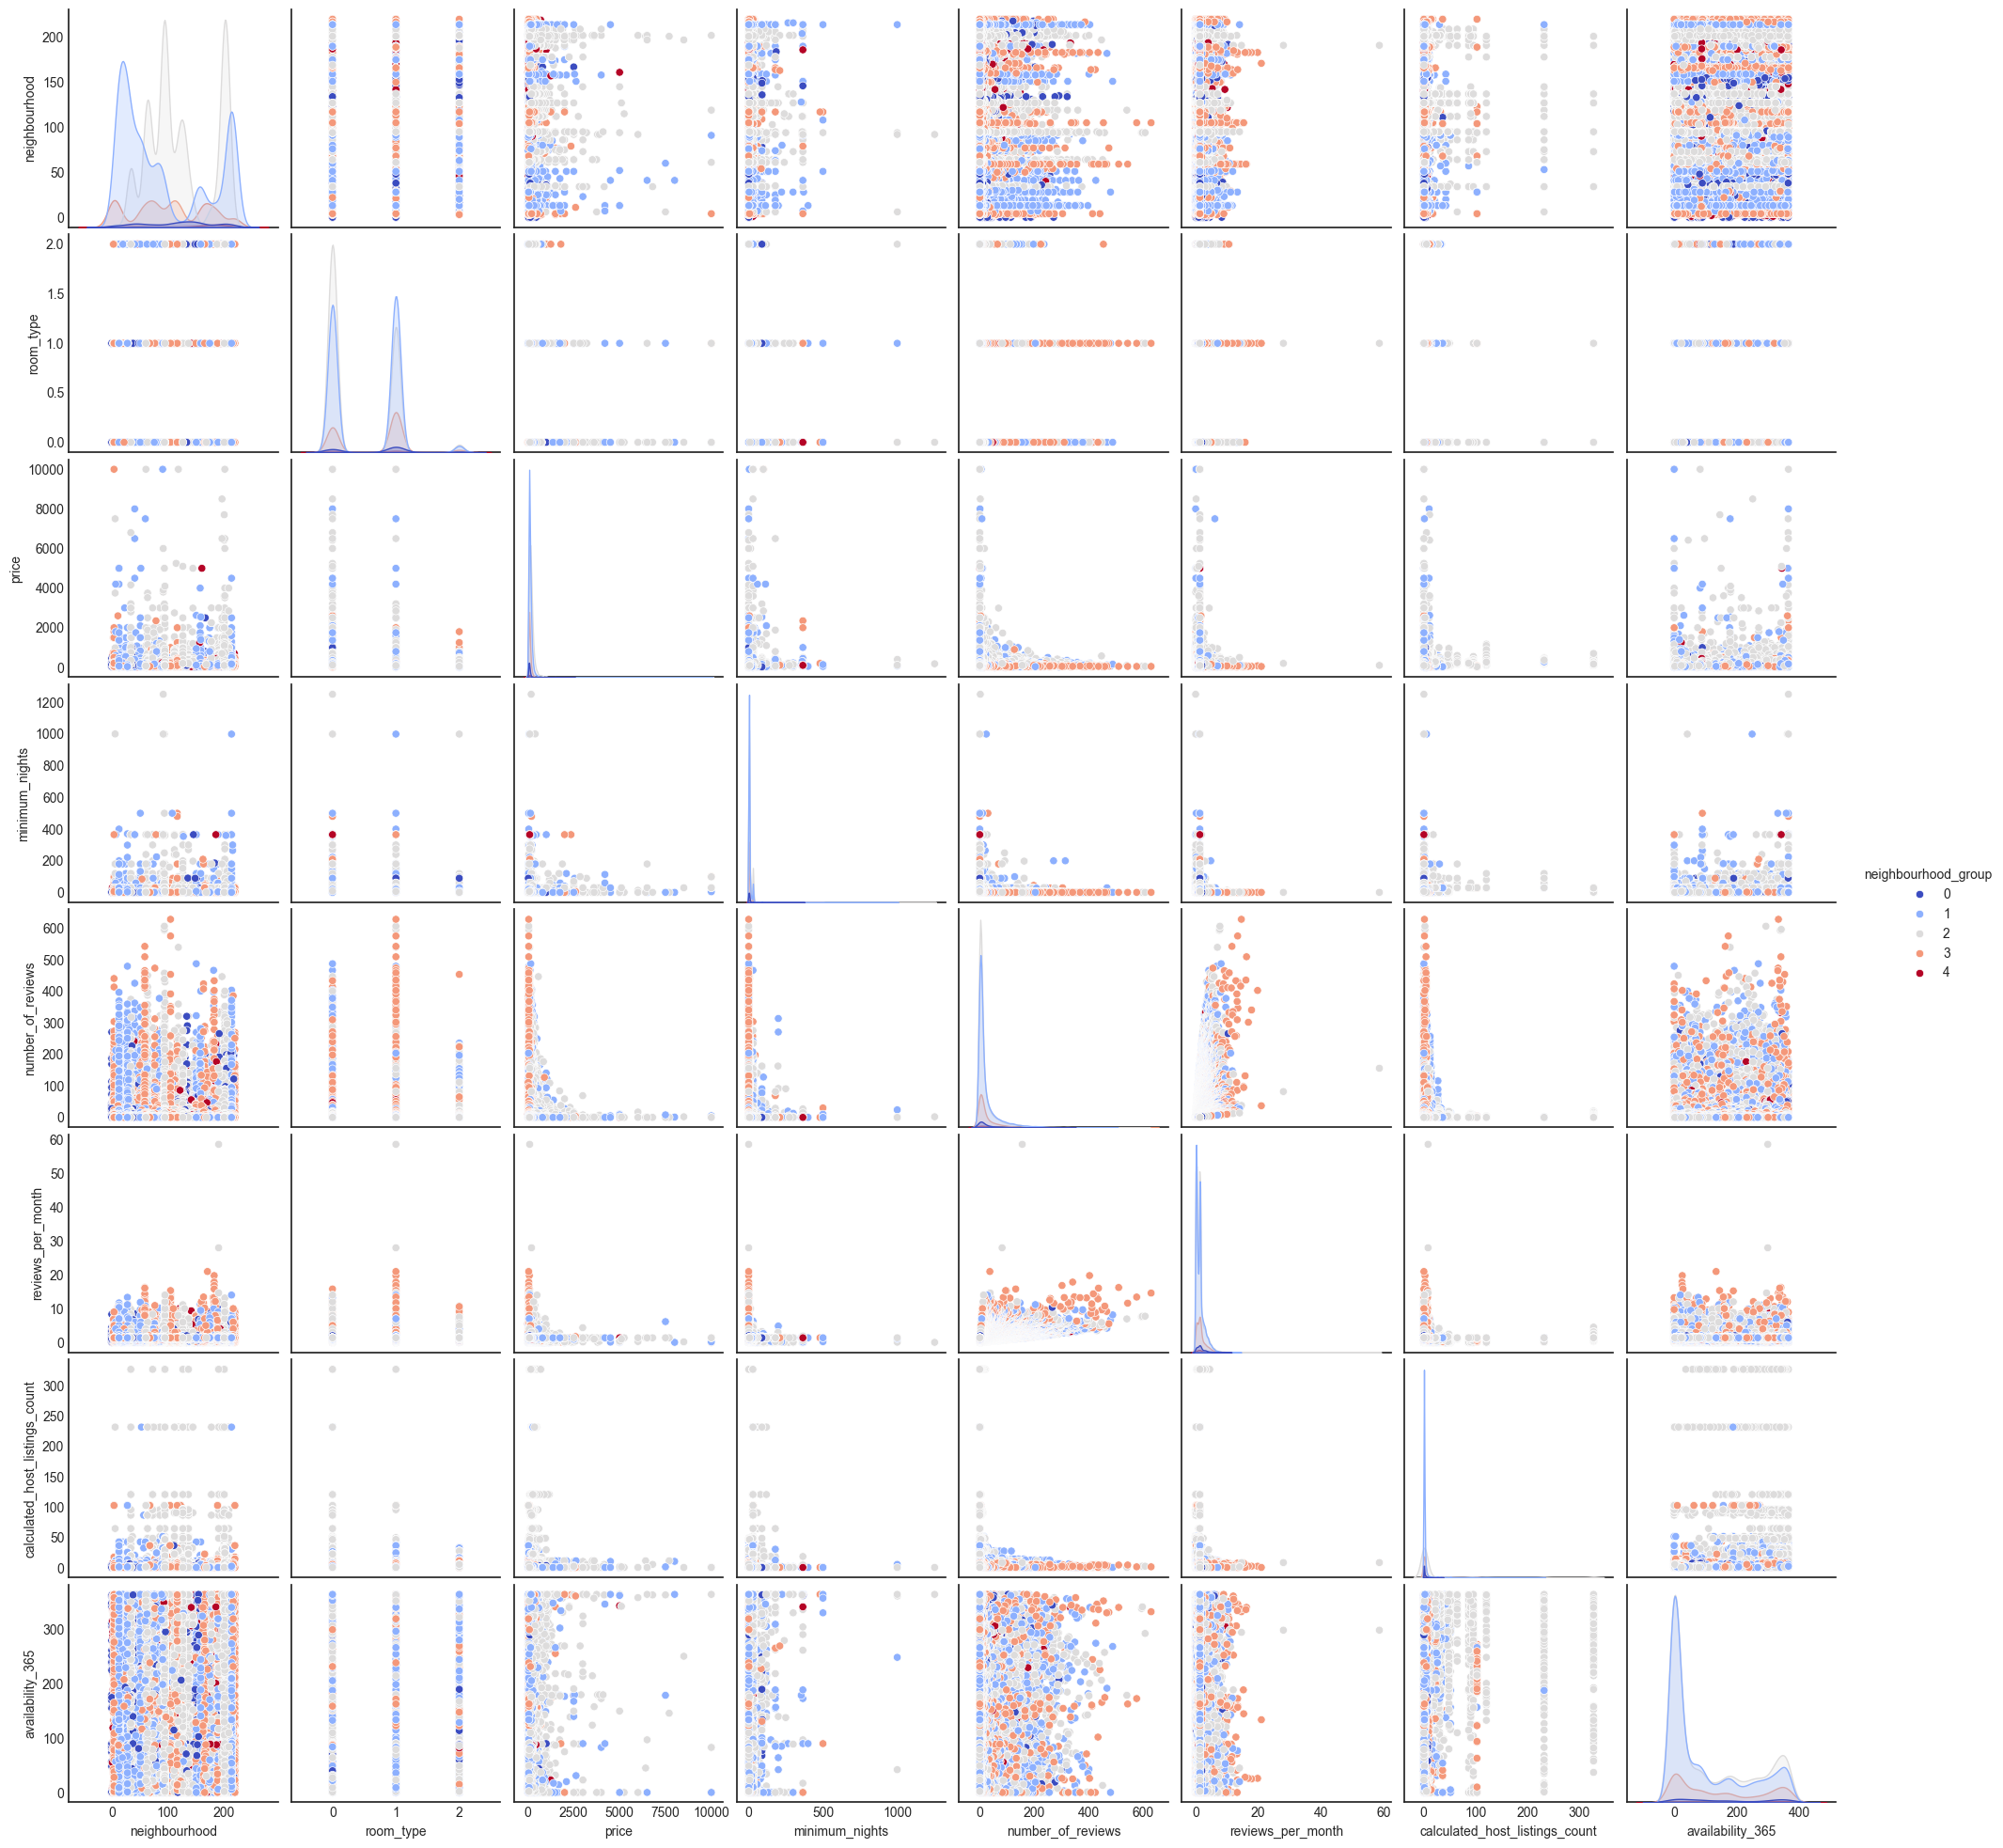

In [106]:
plt.figure(figsize=(10,12))
sns.pairplot(df_new1.drop(['id'],axis=1), hue='neighbourhood_group',palette="coolwarm")
plt.show()

<Figure size 500x600 with 0 Axes>

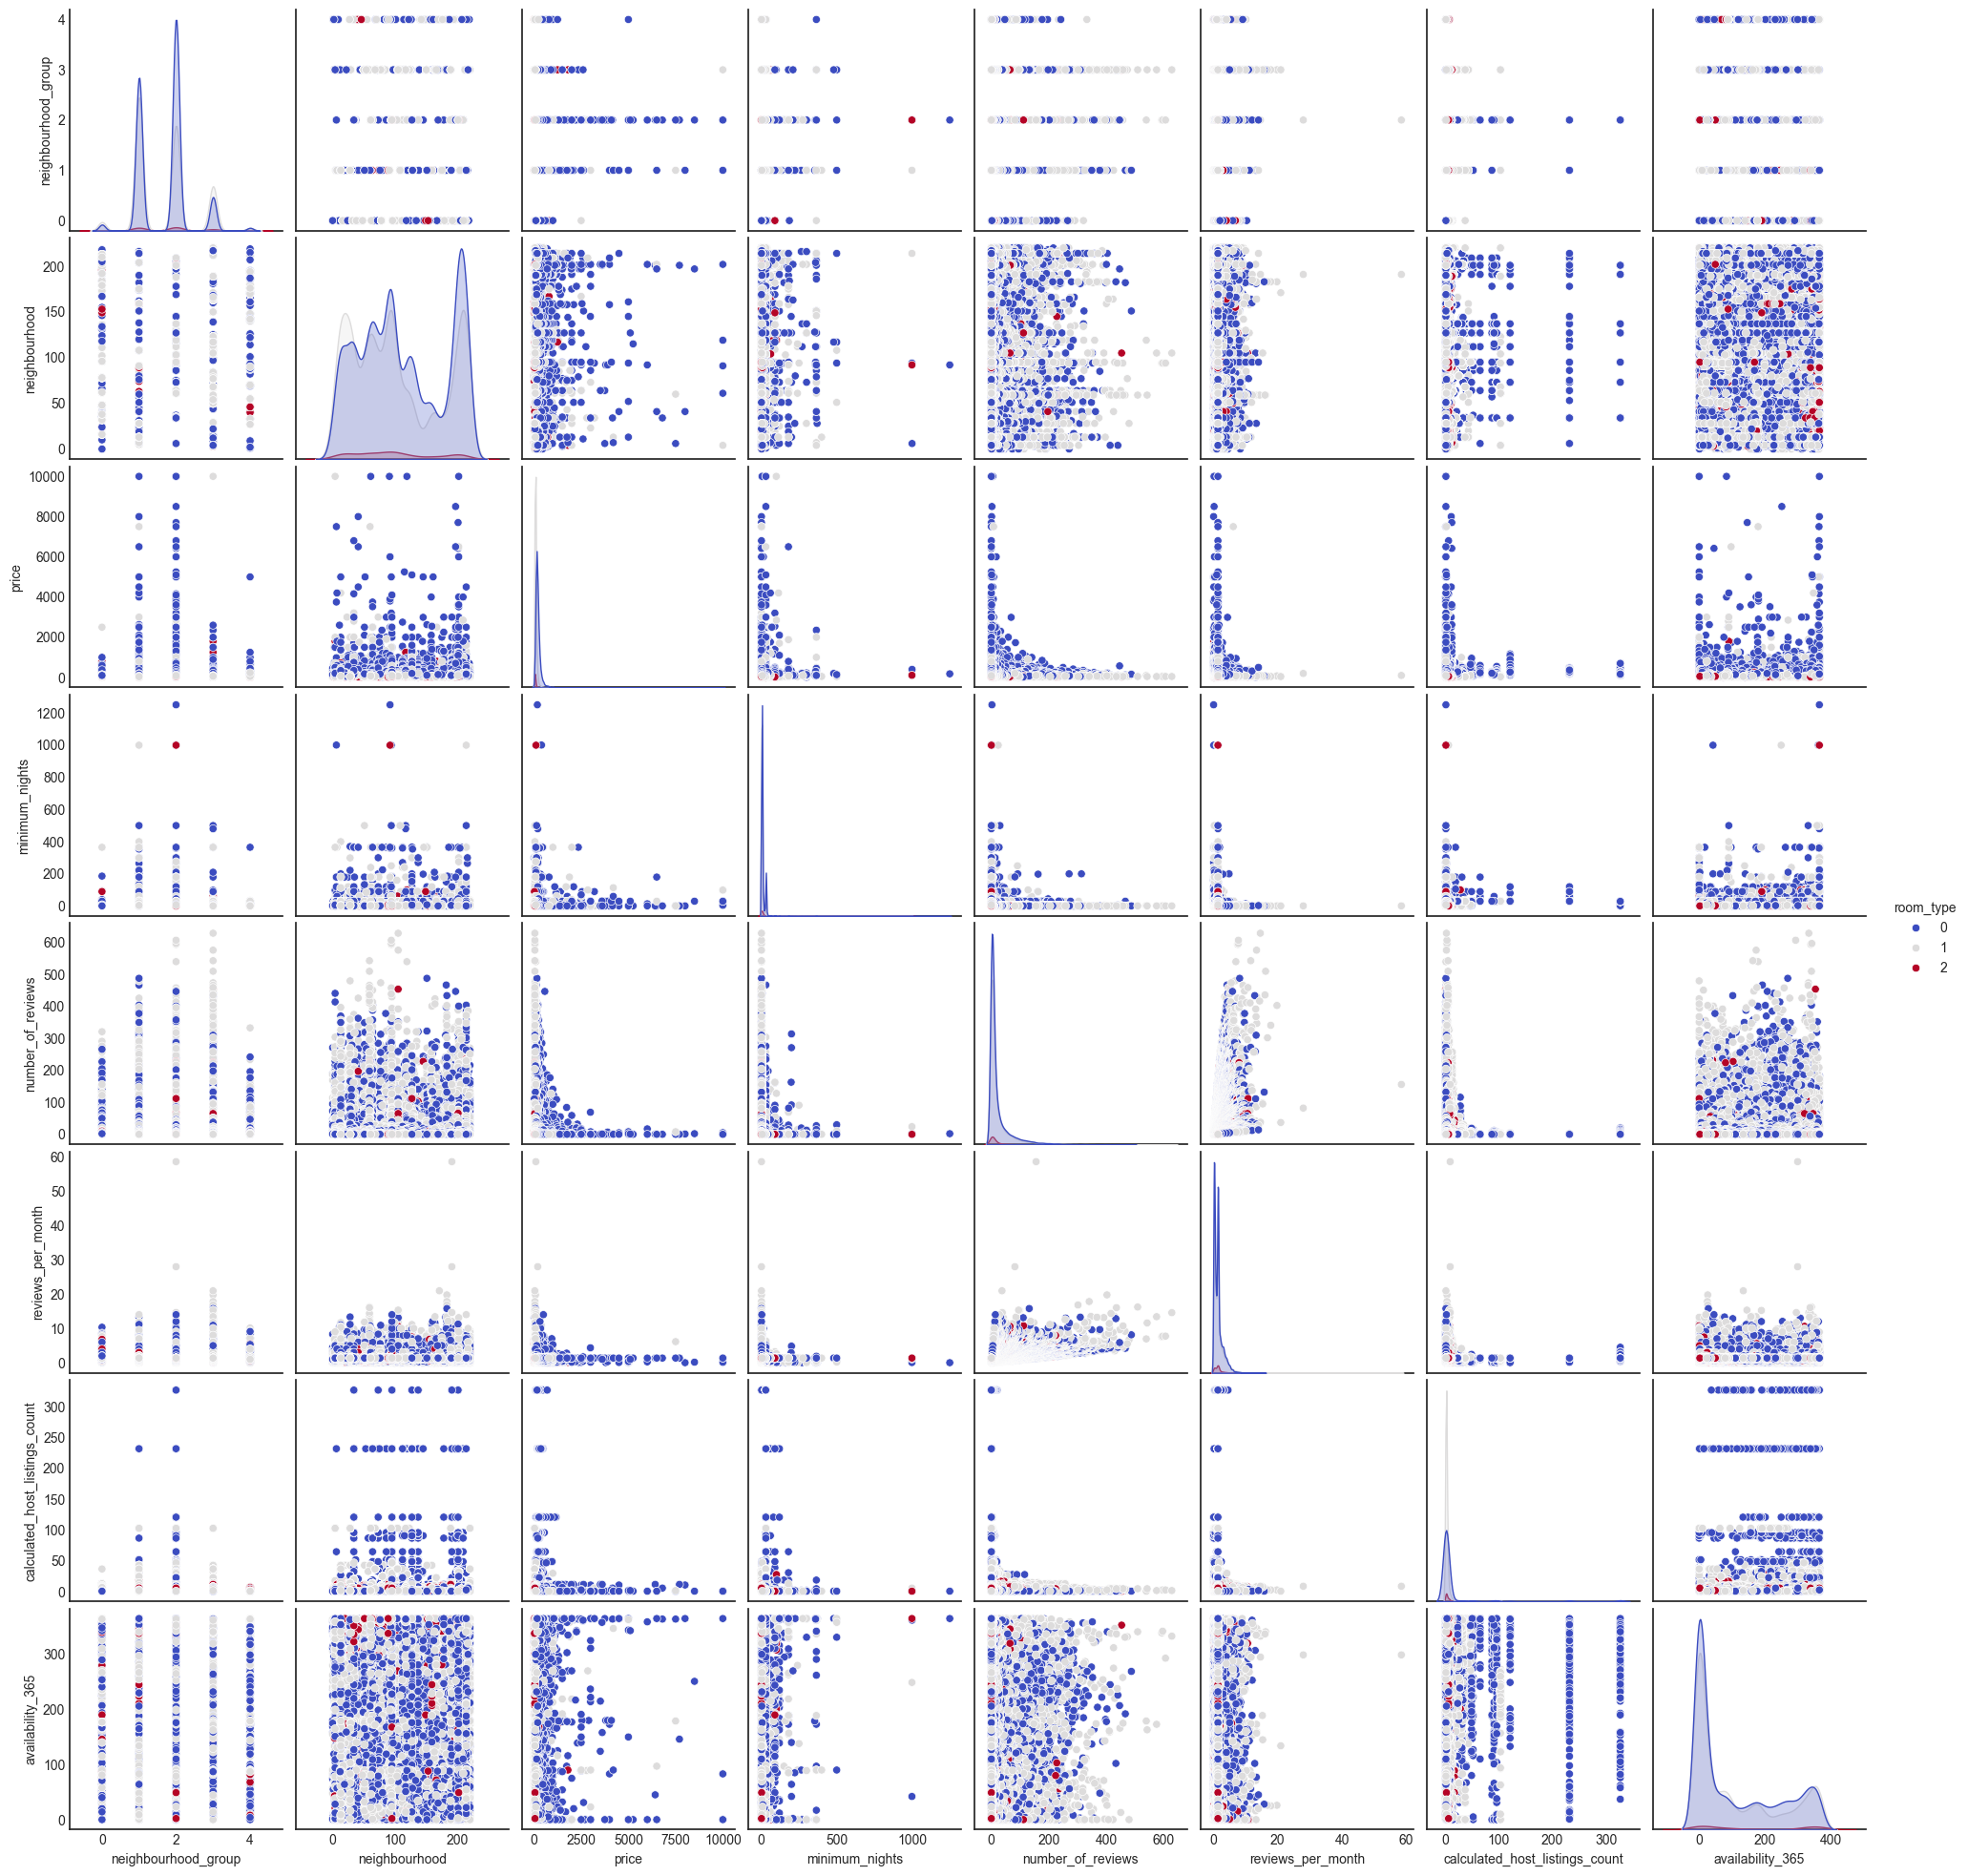

In [38]:
plt.figure(figsize=(5,6))
sns.pairplot(df_new1.drop(['id'],axis=1), hue='room_type',palette="coolwarm")
plt.show()

In [43]:
df_new2  = df_new. drop(['name', 'host_name', 'last_review'], axis=1)
df_new2.head()

id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0  2539     2787                    1            108  40.64749  -73.97237   
1  2595     2845                    2            127  40.75362  -73.98377   
2  3647     4632                    2             94  40.80902  -73.94190   
3  3831     4869                    1             41  40.68514  -73.95976   
4  5022     7192                    2             61  40.79851  -73.94399   

   room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
0          1    149               1                  9           0.210000   
1          0    225               1                 45           0.380000   
2          1    150               3                  0           1.373221   
3          0     89               1                270           4.640000   
4          0     80              10                  9           0.100000   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

# MODEL BUILDING 

In [ ]:
#extracting features(x= independent variables) and y =target(dependent variables):

In [121]:
x=df_new2.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12]].values
x

array([[2.53900000e+03, 2.78700000e+03, 1.00000000e+00, ...,
        2.10000000e-01, 6.00000000e+00, 3.65000000e+02],
       [2.59500000e+03, 2.84500000e+03, 2.00000000e+00, ...,
        3.80000000e-01, 2.00000000e+00, 3.55000000e+02],
       [3.64700000e+03, 4.63200000e+03, 2.00000000e+00, ...,
        1.37322143e+00, 1.00000000e+00, 3.65000000e+02],
       ...,
       [3.64854310e+07, 2.34929520e+07, 2.00000000e+00, ...,
        1.37322143e+00, 1.00000000e+00, 2.70000000e+01],
       [3.64856090e+07, 3.09857590e+07, 2.00000000e+00, ...,
        1.37322143e+00, 6.00000000e+00, 2.00000000e+00],
       [3.64872450e+07, 6.81198140e+07, 2.00000000e+00, ...,
        1.37322143e+00, 1.00000000e+00, 2.30000000e+01]])

In [122]:
y=df_new2.iloc[:,6].values
y

array([1, 0, 1, ..., 0, 2, 1], dtype=int64)

In [123]:
#SPLITTING INTO TRAIN AND TEST SETS:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

1) MULTIPLE LOGISTIC REGRESSION

In [124]:
#fitting logistic regression to the training set:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #to check how well our model is

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [125]:
#predicting and checking accuracy of train data:
x_train_prediction=log_reg.predict(x_train)

training_data_accuracy_lr=accuracy_score(x_train_prediction,y_train)
print("ACCURACY OF TRAIN DATA : " , training_data_accuracy_lr*100 , "%")

ACCURACY OF TRAIN DATA :  52.547770700636946 %


In [126]:
#predicting and checking accuracy of test data:
x_test_prediction=log_reg.predict(x_test)

test_data_accuracy_lr=accuracy_score(x_test_prediction,y_test)
print("ACCURACY OF TEST DATA : " , test_data_accuracy_lr*100 , "%")

ACCURACY OF TEST DATA :  53.09155361647011 %


[[14073 11717   518]
 [ 3700  3912   297]
 [    7     2     0]]


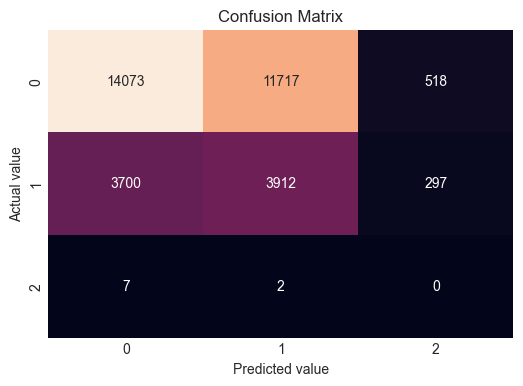

In [127]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
conf_matrix=confusion_matrix(x_train_prediction,y_train)
print(conf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

2. K- Nearest neighbour (KNN)

In [128]:
# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [129]:
#Fitting K-NN classifier to the training set:

from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
#Predicting the test set result 

y_pred=classifier.predict(x_test)

In [131]:
#checking accuracy of result:

from sklearn.metrics import accuracy_score

accuracy_KNN=accuracy_score(y_test,y_pred)

print("ACCURACY OF K- NEAREST NEIGHBOUR: " , accuracy_KNN*100, "%")

ACCURACY OF K- NEAREST NEIGHBOUR:  53.7630890052356 %


Text(55.58333333333333, 0.5, 'PREDICTED VALUES')

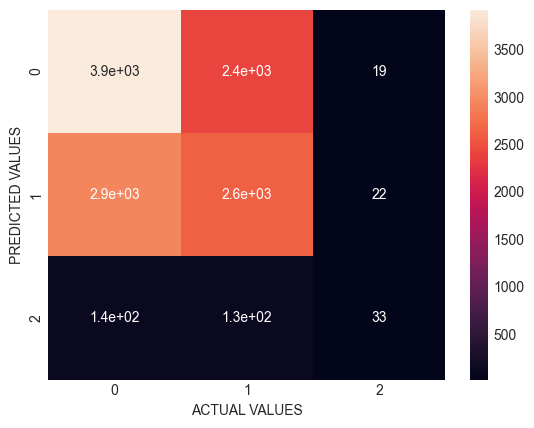

In [132]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

cm

#visualizing the Confusion matrix

sns.heatmap(cm , annot=True)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

3. DECISION TREE

In [133]:
#splitting dataset into training and test sets:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [134]:
#fitting decision tree model to the training set:

from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion="entropy" , random_state=0)

classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [135]:
#predicting result:

y_pred=classifier.predict(x_test)

In [136]:
#creating confusion matrix:

cm=confusion_matrix(y_test,y_pred)
cm

array([[4169,  904,   29],
       [ 831, 3478,  129],
       [  28,  104,  107]], dtype=int64)

Text(55.58333333333333, 0.5, 'PREDICTED VALUES')

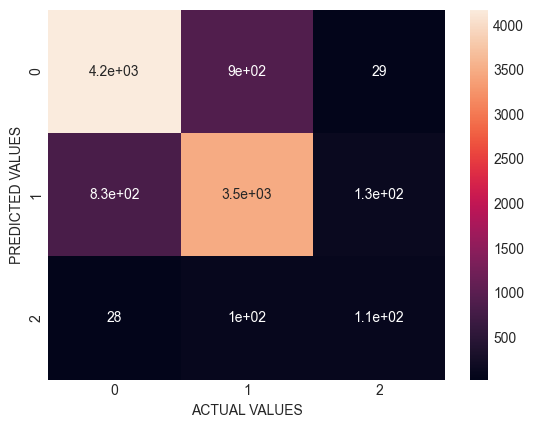

In [137]:
sns.heatmap(cm , annot=True)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

In [138]:
#checking accuracy of result:

from sklearn.metrics import accuracy_score

accuracy_DTE=accuracy_score(y_test,y_pred)

print("ACCURACY OF DECISION TREE MODEL (ENTROPY): " , accuracy_DTE*100, "%")

ACCURACY OF DECISION TREE MODEL (ENTROPY):  79.29236118212496 %


In [139]:
# USING GINI GAIN
#fitting decision tree model to the training set:

from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(criterion="gini" , min_samples_split=2)

classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [140]:
#Visualizing the Tree which is formed on train dataset

#plt.figure(figsize=(10,5))
#tree.plot_tree(classifier)

In [141]:
#predicting result:

y_pred=classifier.predict(x_test)
#checking accuracy:

accuracy_DTG=accuracy_score(y_test,y_pred)

print("ACCURACY OF DECISION TREE MODEL (GINI): " , accuracy_DTG*100, "%")

ACCURACY OF DECISION TREE MODEL (GINI):  78.94467736987421 %


4. RANDOM TREE FOREST

In [142]:
#splitting dataset into training and test sets:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [143]:
#fitting random forest to the training set:

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(random_state=100)

classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [144]:
#predicting result:

y_pred=classifier.predict(x_test)

Text(55.58333333333333, 0.5, 'PREDICTED VALUES')

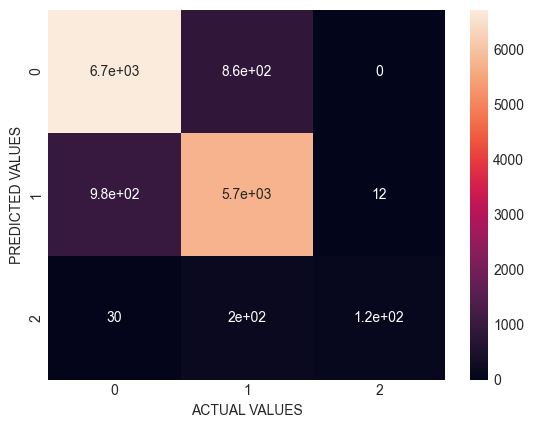

In [145]:
#creating confusion matrix:

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm


#visualizing the Confusion matrix

sns.heatmap(cm , annot=True)

plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

In [146]:
#checking accuray:

from sklearn.metrics import accuracy_score

accuracy_RM=accuracy_score(y_test, y_pred)

print("ACCURACY OF RANDOM TREE MODEL : " , accuracy_RM*100 , "%")

ACCURACY OF RANDOM TREE MODEL :  85.78635217124548 %


In [160]:
Logistic_Regression = training_data_accuracy_lr*100 
print("ACCURACY OF LOGISTIC REGRESSION                : " , Logistic_Regression , "%")

K_NearestNeighbors= accuracy_KNN*100
print("\nACCURACY OF K- NEAREST NEIGHBOUR               : " , K_NearestNeighbors, "%")

Decision_Tree1 = accuracy_DTE*100
print("\nACCURACY OF DECISION TREE MODEL (ENTROPY)      : " , Decision_Tree1, "%")

Decision_Tree2 = accuracy_DTG*100
print("ACCURACY OF DECISION TREE MODEL (GINI)         : " , Decision_Tree2, "%")


Random_Forest = accuracy_RM*100
print("\nACCURACY OF RANDOM TREE MODEL                  : " , Random_Forest , "%")



ACCURACY OF LOGISTIC REGRESSION                :  52.547770700636946 %

ACCURACY OF K- NEAREST NEIGHBOUR               :  53.7630890052356 %

ACCURACY OF DECISION TREE MODEL (ENTROPY)      :  79.29236118212496 %
ACCURACY OF DECISION TREE MODEL (GINI)         :  78.94467736987421 %

ACCURACY OF RANDOM TREE MODEL                  :  85.78635217124548 %


In [170]:
models = ["Logistic Regression ","K_NearestNeighbors","Decision Tree 1","Decision Tree 2","Random_Forest"]
print(models)

['Logistic Regression ', 'K_NearestNeighbors', 'Decision Tree 1', 'Decision Tree 2', 'Random_Forest']


In [189]:
accuracy_list = [Logistic_Regression, K_NearestNeighbors, Decision_Tree1, Decision_Tree2, Random_Forest]


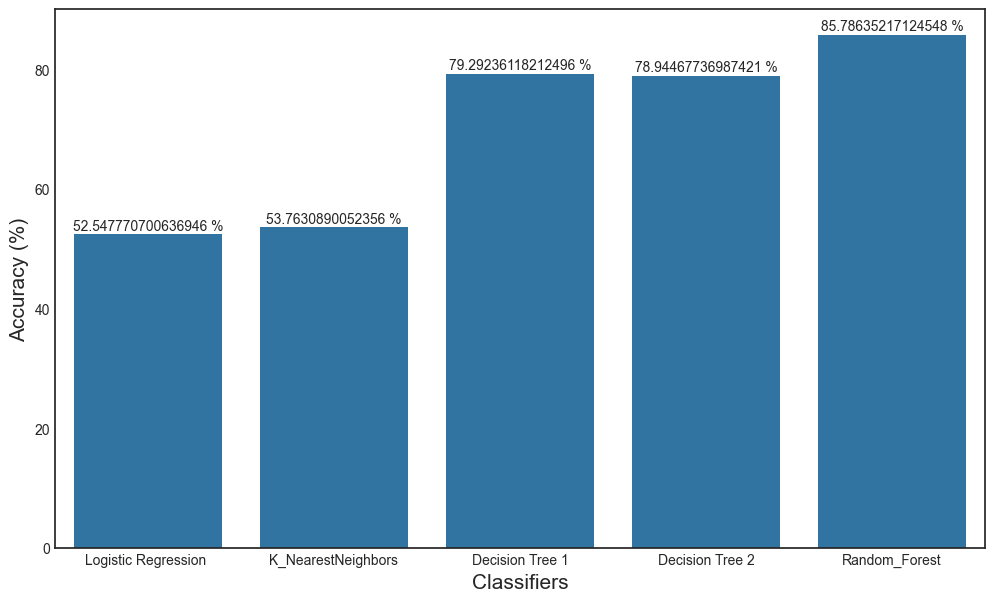

In [188]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()